In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/US_Dataset/US_Accidents_March23.csv')

In [ ]:
print(df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


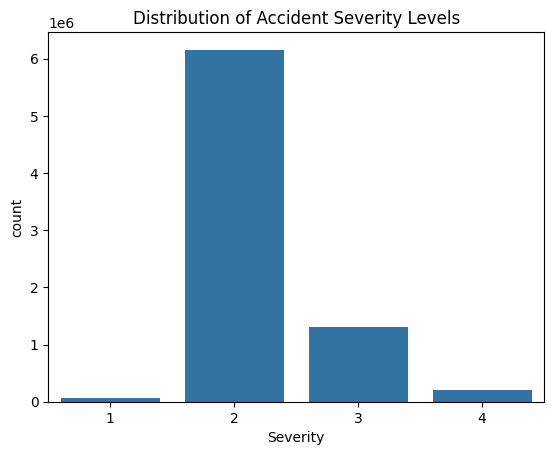

In [ ]:
#1
sns.countplot(data=df, x="Severity")
plt.title("Distribution of Accident Severity Levels")
plt.show()

Text(0.5, 1.0, 'Accident Frequency by Hour of the Day')

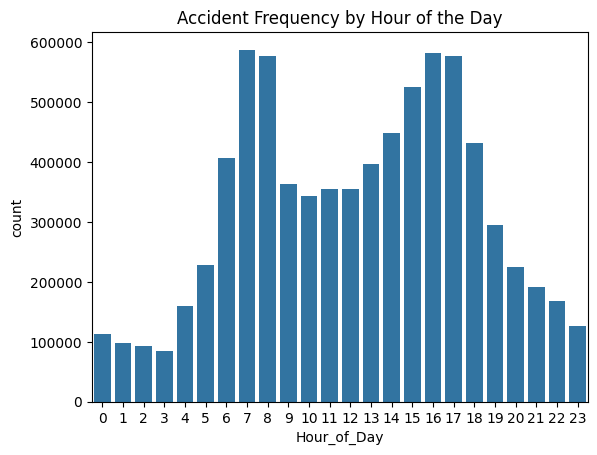

In [ ]:
#2
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors='coerce')


df["Hour_of_Day"] = df["Start_Time"].dt.hour

sns.countplot(data=df, x="Hour_of_Day")
plt.title("Accident Frequency by Hour of the Day")

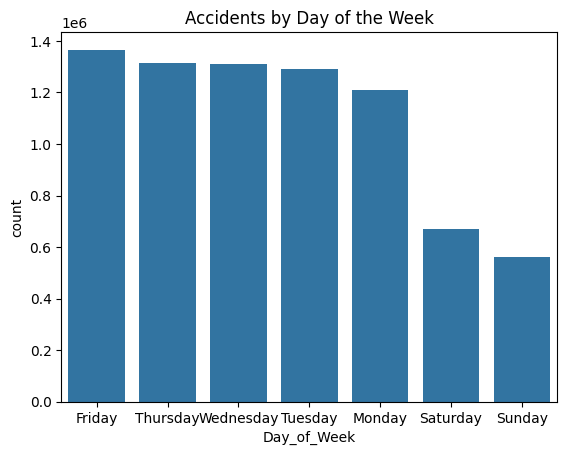

In [ ]:
#3
df["Day_of_Week"] = df["Start_Time"].dt.day_name()
sns.countplot(data=df, x="Day_of_Week", order=df["Day_of_Week"].value_counts().index)
plt.title("Accidents by Day of the Week")
plt.show()

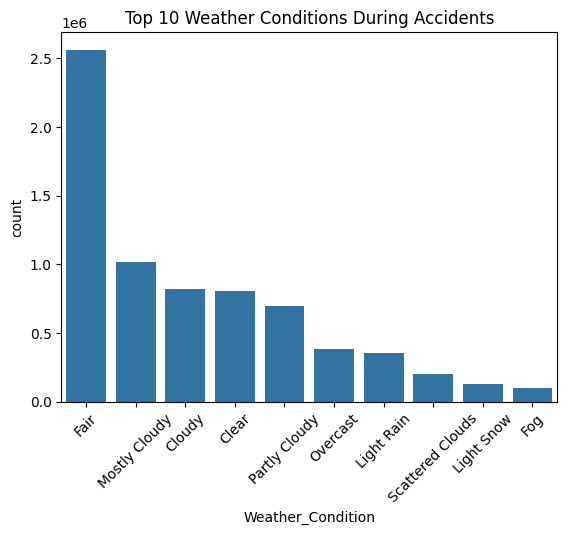

In [ ]:
#4
sns.countplot(data=df, x="Weather_Condition", order=df["Weather_Condition"].value_counts().index[:10])
plt.title("Top 10 Weather Conditions During Accidents")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#5
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print(pd.DataFrame({"Missing Values": missing, "Percentage": missing_percent}))

                       Missing Values  Percentage
ID                                  0    0.000000
Source                              0    0.000000
Severity                            0    0.000000
Start_Time                          0    0.000000
End_Time                            0    0.000000
Start_Lat                           0    0.000000
Start_Lng                           0    0.000000
End_Lat                       3402762   44.029355
End_Lng                       3402762   44.029355
Distance(mi)                        0    0.000000
Description                         5    0.000065
Street                          10869    0.140637
City                              253    0.003274
County                              0    0.000000
State                               0    0.000000
Zipcode                          1915    0.024779
Country                             0    0.000000
Timezone                         7808    0.101030
Airport_Code                    22635    0.292881


In [ ]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
#7
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#8
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Encoded_Severity"] = le.fit_transform(df["Severity"])
print(df[["Severity", "Encoded_Severity"]].head())

   Severity  Encoded_Severity
0         3                 2
1         2                 1
2         2                 1
3         3                 2
4         2                 1


In [ ]:
#9
one_hot = pd.get_dummies(df["Weather_Condition"], prefix="Weather")
df = pd.concat([df, one_hot], axis=1)
print(df.head())

    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng    End_Lat   End_Lng  Distance(mi)  ...  \
0 -84.058723  36.183495 -88.02789          0.01  ...   
1 -82.831184  36.183495 -88.02789          0.01  ...   
2 -84.032608  36.183495 -88.02789          0.01  ...   
3 -84.205582  36.183495 -88.02789          0.01  ...   
4 -84.188354  36.183495 -88.02789          0.01  ...   

  Weather_Thunder in the Vicinity Weather_Thunderstorm  \
0                           False                False   
1                           False                False   
2 